# Table of Content
1. [Load Data](#first-bullet)
2. [100 intensity](#second-bullet)
3. [75 intensity](#third-bullet)
4. [50 intensity](#fourth-bullet)
5. [25 intensity](#fifth-bullet)
6. [Save Image](#sixth-bullet)

--------------
# Load Data <a class="anchor" id="first-bullet"></a>


In [1]:
import torchvision
from matplotlib.pyplot import imshow, pause

datasets=torchvision.datasets.MNIST('./', train=True, transform=None, target_transform=None, download=True)

In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from Functions import *


images = getData('MNIST')
noisy_images = get_noisy_image(images.numpy(),0.1)

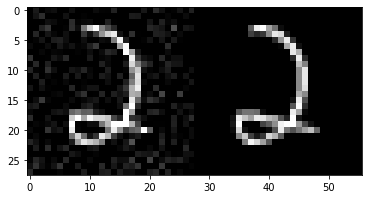

In [3]:
getPlot([np.squeeze(torch.tensor(noisy_images),1),np.squeeze(images,1)])

# Trial <a class='anchor' id="second-bullet"></a>

In [18]:
import torch.nn as nn

class RNN(nn.Module):
    """docstring for RNN."""

    def __init__(self, n_steps,n_neurons, gamma=0.001, epsilon=0.01):
        super(RNN, self).__init__()
        self.W = nn.Parameter(torch.randn(n_neurons, n_neurons))
        self.b = nn.Parameter(torch.randn(1,n_neurons))
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_neurons = n_neurons

    def forward(self, X):
        output = []
        self.ht = torch.zeros(X.shape[0], self.n_neurons)
        states = []
        states.append(self.ht)

        for i in range(n_steps):
            alpha = torch.mm(states[i],W)+self.b
            self.ht = states[i] + self.epsilon*torch.tanh(alpha)
            states.append(self.ht)
        return states

In [20]:
net = RNN(n_steps=30,n_neurons=28)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()
n_epochs = 5

In [ ]:
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    y_pred, _ = net(torch.tensor())
    loss = criterion(y_pred, torch.tensor(y_batch, dtype=torch.float))
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordinglyoutput, hidden = model(input_seq)
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.8e}".format(loss.item()))